In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from datetime import datetime, timedelta

In [2]:
train_raw = pd.read_csv("train.csv")
train_raw #3,362,796 x 8 columns

,store_id,date,time,card_id,amount,installments,days_of_week,holyday
0,0,2016-12-14,18:05:31,d297bba73f,5,NaN,2,0
1,0,2016-12-14,18:05:54,d297bba73f,-5,NaN,2,0
2,0,2016-12-19,12:42:31,0880849c05,144,NaN,0,0
3,0,2016-12-19,12:48:08,8b4f9e0e95,66,NaN,0,0
4,0,2016-12-19,13:31:08,7ad237eed0,24,NaN,0,0
...,...,...,...,...,...,...,...,...
3362791,1799,2018-07-19,17:58:31,e254bf70d9,600,NaN,3,0
3362792,1799,2018-07-19,18:54:34,8f41c89891,275,NaN,3,0
3362793,1799,2018-07-22,14:46:57,aeb64fe1fb,350,NaN,6,0
3362794,1799,2018-07-25,18:09:13,57932602d6,300,NaN,2,0


In [3]:
train_raw.isnull().sum() #installments에만 결측치 존재

store_id              0
date                  0
time                  0
card_id               0
amount                0
installments    3345936
days_of_week          0
holyday               0
dtype: int64

In [4]:
train = train_raw.fillna(0)

In [5]:
train.corr()['amount'].sort_values()

days_of_week   -0.004116
holyday        -0.003965
store_id        0.017302
installments    0.189700
amount          1.000000
Name: amount, dtype: float64

In [6]:
card_id =train_raw['card_id'].unique() #고유의 카드아이디 갯수 922,522 
card_id.shape

(922522,)

In [7]:
train['date_time']= train_raw.loc[:,'date']+ ' ' + train_raw.loc[:,'time']
train =train.drop(['date', 'time'], axis=1)

In [8]:
check_holyday = train_raw[train_raw.holyday ==1]
holiday_list =check_holyday['date'].unique()

In [9]:
train['date_time']=pd.to_datetime(train['date_time'])
train =train.set_index('date_time')

In [10]:
train.dtypes

store_id          int64
card_id          object
amount            int64
installments    float64
days_of_week      int64
holyday           int64
dtype: object

Text(0, 0.5, 'Sales per day')

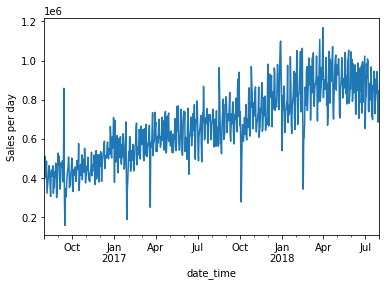

In [11]:
everyday = train['amount'].resample('D').sum()
plt.ylabel("Sales per day")

Text(0, 0.5, 'Sales per day(logscaled)')

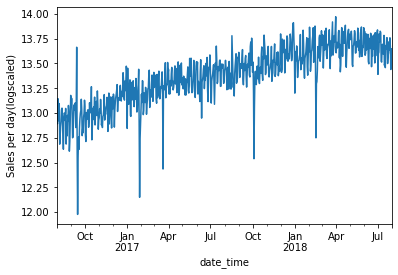

In [13]:
everyday= np.log(everyday)
everyday.plot()
plt.ylabel("Sales per day(logscaled)")

In [ ]:
weekday=train_batch.groupby(train_batch.index.dayofweek).mean()
weekday.index= ['Mon', 'Tue','Wed','Thu', 'Fri', 'Sat', 'Sun']
weekday.plot()